In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [173]:
df = pd.read_csv(r"C:\Users\aniketh\Downloads\Online\OnlineRetail.csv", encoding='ISO-8859-1')

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [100]:
df.shape

(541909, 8)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [102]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [103]:
df.drop(['Description', 'CustomerID'], axis=1, inplace=True)

In [104]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ MB


In [106]:
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [107]:
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [108]:
len(df['Country'].unique())

38

In [110]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [111]:
X=df
y=df['UnitPrice']

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['UnitPrice'] = le.fit_transform(X['UnitPrice'])
y = le.transform(y)

In [125]:
# Convert 'InvoiceDate' to datetime
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'], format='%d-%m-%Y %H:%M')
# Convert 'InvoiceDate' to number of days since the first date
X['InvoiceDate'] = (X['InvoiceDate'] - X['InvoiceDate'].min()).dt.days
# Apply Label Encoding to 'InvoiceNo' and 'Country'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['InvoiceNo'] = le.fit_transform(X['InvoiceNo'])
X['Country'] = le.fit_transform(X['Country'])
# Now apply MinMaxScaler
X = ms.fit_transform(X)


In [128]:
# Convert numpy array back to pandas DataFrame
X = pd.DataFrame(X, columns=['InvoiceNo', 'Quantity', 'UnitPrice', 'Country', 'InvoiceDate'])
print(X.head())

   InvoiceNo  Quantity  UnitPrice   Country  InvoiceDate
0        0.0  0.500037        0.0  0.111725     0.972973
1        0.0  0.500037        0.0  0.139963     0.972973
2        0.0  0.500049        0.0  0.116636     0.972973
3        0.0  0.500037        0.0  0.139963     0.972973
4        0.0  0.500037        0.0  0.139963     0.972973


In [129]:
cols=X.columns

In [130]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [132]:
X = pd.DataFrame(X, columns=[cols])

In [133]:
X.head()

,InvoiceNo,Quantity,UnitPrice,Country,InvoiceDate
0,0.0,0.500037,0.0,0.111725,0.972973
1,0.0,0.500037,0.0,0.139963,0.972973
2,0.0,0.500049,0.0,0.116636,0.972973
3,0.0,0.500037,0.0,0.139963,0.972973
4,0.0,0.500037,0.0,0.139963,0.972973


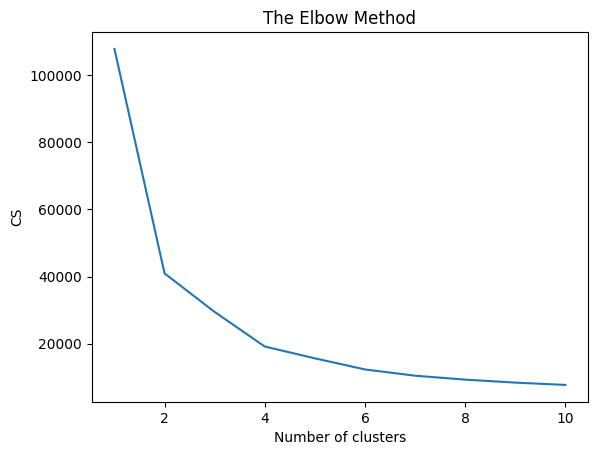

In [134]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [135]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [136]:
kmeans.cluster_centers_


array([[0.64674513, 0.5000591 , 0.81597666, 0.11234628, 0.92465856],
       [0.19695179, 0.5000588 , 0.26889639, 0.1203772 , 0.92758422]])

In [137]:
kmeans.inertia_

40934.58555369246

In [138]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1415 out of 541909 samples were correctly labeled.


In [139]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


In [140]:
# k= 3

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 974 out of 541909 samples were correctly labeled.
Accuracy score: 0.00


In [160]:
# k= 5

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 963 out of 541909 samples were correctly labeled.
Accuracy score: 0.00


In [180]:
# Assuming X_df is your DataFrame
print(X_df.columns)

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'Country', 'InvoiceDate'], dtype='object')


In [177]:
x = df.iloc[:, [0, 2]].values  

In [185]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Attempt to read the CSV file using 'ISO-8859-1' encoding
chunk_size = 100000  # Define the chunk size
scaler = MinMaxScaler()

# Initialize an empty list to hold the processed chunks
scaled_chunks = []

for chunk in pd.read_csv(r"C:\Users\aniketh\Downloads\Online\OnlineRetail.csv", chunksize=chunk_size, encoding='ISO-8859-1'):
    chunk = chunk[['Quantity', 'UnitPrice']]  # Select only relevant columns
    chunk = chunk.astype('float32')  # Convert to a smaller data type to reduce memory usage
    chunk_scaled = scaler.fit_transform(chunk)  # Scale the chunk
    scaled_chunks.append(chunk_scaled)

# Concatenate the scaled chunks
X_scaled = np.concatenate(scaled_chunks, axis=0)

# Perform hierarchical clustering (dendrogram)
dendro = shc.dendrogram(shc.linkage(X_scaled, method="ward"))
plt.title("Dendrogram Plot")
plt.show()



 

MemoryError: Unable to allocate 1.07 TiB for an array with shape (146832411186,) and data type float64

In [187]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, linkage='ward')  
y_pred= hc.fit_predict(x)  

ValueError: could not convert string to float: 'C536379'

In [189]:
#visulaizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')   
mtp.legend()  
mtp.show()

NameError: name 'mtp' is not defined

In [191]:
df = pd.read_csv(r"C:\Users\aniketh\Downloads\Online\OnlineRetail.csv", encoding='ISO-8859-1')

In [192]:
X = df.iloc[:, [3, 4]].values

In [194]:
import numpy as np #linear algebra 
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals


from sklearn.cluster import DBSCAN #DBSCAN

from sklearn.preprocessing import StandardScaler #scaler

In [195]:
db = DBSCAN(eps=3,min_samples=4)

In [199]:
model = db.fit(X)
labels=model.labels_

ValueError: could not convert string to float: '01-12-2010 08:26'

In [200]:
labels

array([1, 1, 1, ..., 4, 4, 4])

In [201]:
from sklearn import metrics

In [203]:
sample_scores=np.zeros_like(labels,dtype=bool)

In [204]:
sample_scores

array([False, False, False, ..., False, False, False])

In [205]:
print(metrics.silhouette_score(X,labels))

ValueError: could not convert string to float: '01-12-2010 08:26'